1.	Try the following Python code to plot sine wave using Matplotlib.

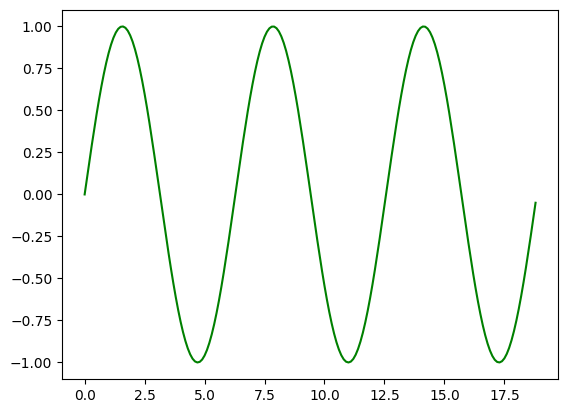

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,6*np.pi,0.1)
y = np.sin(x)

plt.plot(x,y,color="green")
plt.show()

2.	Try plotting the following signals in the same way as in Q1 [Hint: You may need SciPy]


        i.	Cosine wave 

/var/folders/g2/q389cdx52gj72f35_zn361d40000gn/T/ipykernel_4742/1992113268.py:38: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, unit_impulse_wave, use_line_collection=True, label='Unit Impulse', markerfmt='ro', linefmt='r--', basefmt='r')


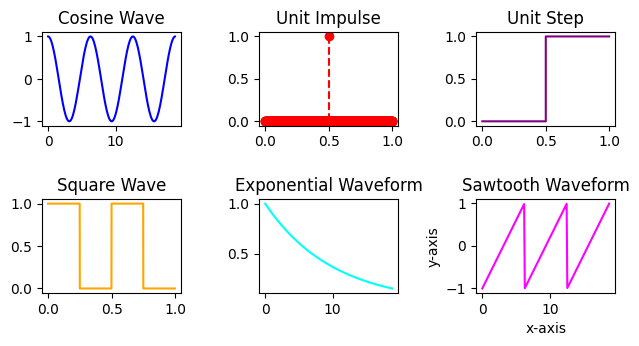

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import unit_impulse, square, sawtooth

# Creating x axis with range
x = np.arange(0, 6*np.pi, 0.1)

t = np.linspace(0, 1, 1000, endpoint=False)  # 1 second duration

# Cosine wave
y_cos = np.cos(x)

# Unit impulse
# 1 --> t=0
# 0 --> t!=0
unit_impulse_wave = unit_impulse(len(t), 'mid')  # Unit impulse at t = 0.5

# Unit step wave
#1 --> t>=0
#0 --> t<0
unit_step_wave = np.heaviside(t-0.5, 1)  # Unit step starting at t = 0.5

# Square wave
square_wave = 0.5 * (square(2 * np.pi * 2 * t) + 1)  # 2 Hz square wave

# Exponential waveform
y_exponential = np.exp(-0.1 * x)

# Sawtooth waveform
# 2 * (t - np.floor(t + 0.5))
y_sawtooth = signal.sawtooth(x)

# Plotting Sine and Cosine Waves
plt.subplot(3,3,1)
plt.plot(x, y_cos, label='Cosine', color='blue')
plt.title('Cosine Wave')
plt.subplot(3,3,2)
plt.stem(t, unit_impulse_wave, use_line_collection=True, label='Unit Impulse', markerfmt='ro', linefmt='r--', basefmt='r')
plt.title('Unit Impulse')
plt.subplot(3,3,3)
plt.step(t, unit_step_wave, label='Unit Step', where='post', color='purple')
plt.title('Unit Step')
plt.subplot(3,3,4)
plt.plot(t, square_wave, label='Square Wave', color='orange')
plt.title('Square Wave')
plt.subplot(3,3,5)
plt.plot(x, y_exponential, label='Exponential Waveform', color='cyan')
plt.title('Exponential Waveform')
plt.subplot(3,3,6)
plt.plot(x, y_sawtooth, label='Sawtooth Waveform', color='magenta')
plt.title('Sawtooth Waveform')

# Adding labels and legend
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Adjust layout to prevent clipping of titles
plt.tight_layout(h_pad=2, w_pad=2)

# Display the plot
plt.show()

3.	Let’s generate an audio signal. Explore the following code (Ex. Try varying the sample rate and see what happens).

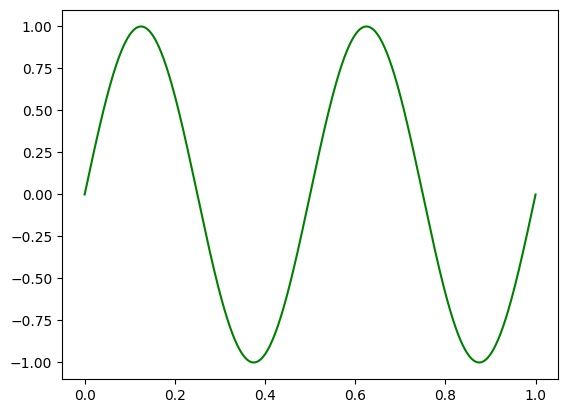

CPU times: user 182 ms, sys: 3.63 ms, total: 186 ms
Wall time: 62.3 ms


In [13]:
%%time
SAMPLE_RATE = 44100
DURATION = 1


def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y
x,y = generate_sine_wave(2,sample_rate=SAMPLE_RATE,duration=DURATION)
plt.plot(x,y,color="green")
plt.show()

4.	Now use generate_sine_wave() to generate two signals. How would you change pitch of the signal?

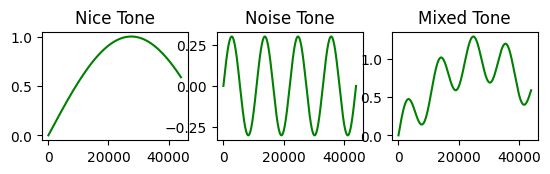

In [14]:
_,nice_tone = generate_sine_wave(0.4,sample_rate=SAMPLE_RATE,duration=DURATION) #frenquency = 0.4
_,noise_tone = generate_sine_wave(4,sample_rate=SAMPLE_RATE,duration=DURATION) #frenquency = 4
noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

plt.subplot(3,3,1)
plt.title("Nice Tone")
plt.plot(nice_tone,color="green")
# plt.show()

plt.subplot(3,3,2)
plt.title("Noise Tone")
plt.plot(noise_tone,color="green")
# plt.show()

plt.subplot(3,3,3)
plt.title("Mixed Tone")
plt.plot(mixed_tone,color="green")
# plt.show()



5.	If you want, you can normalize and save it using the following code snippet [Optional].

In [15]:
from scipy.io.wavfile import write

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
write("sine_wave.wav",SAMPLE_RATE,normalized_tone)


# Normalization makes it from 0 to 1. takes max value and divide all values by it
# 1323, 131,4325, 5325
# 5325/5325, 4325/5325, 131/5325, 1323/5325

6.	Now, let’s implement the fourier transform. [Explore the functions fft() and fftfreq() in detail]

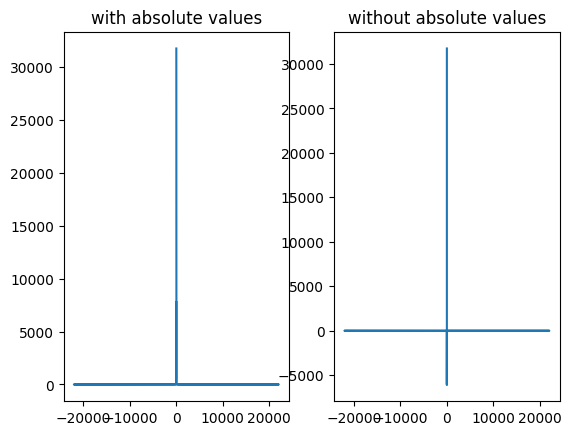

In [16]:
from scipy.fft import fft, fftfreq

sample_rate = 44100
duration = 1

N = sample_rate * duration

mixed_tone = np.array(mixed_tone)

yf = fft(mixed_tone)
xf = fftfreq(N,1/sample_rate)

plt.subplot(1,2,1)
plt.title("with absolute values")
plt.plot(xf,np.abs(yf))
# plt.show()

plt.subplot(1,2,2)
plt.title("without absolute values")
plt.plot(xf,yf)
# plt.show()

7.	Use the function ifft() to reverse the operation. See how it reproduces the original signal.

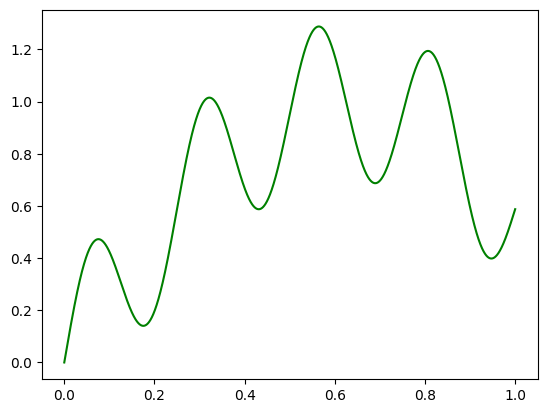

In [17]:
from scipy.fft import ifft

# apply inverse Fourier transform
reproduced_signal = ifft(yf)

# plot the reproduced signal
plt.plot(x, reproduced_signal.real, color='green')
plt.show()
